**Now that we know how to build a model, let's try building on our own!**

### Dataset: Cifar-10

Cifar-10 consists of over 1.6L small images.

These images contain(in order of indexing): 

'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

Try using Sequential and CNN models with your own configurations!

**To get you started:**

1. Try running higher number of iterations (keep it <20 for Seq, < 10 for Conv)
2. Change the number of nodes in the layers (Input and output layers remain same)
3. Change the order of the layers
4. Add more hidden layers (5x Layers with 10 Nodes each is better than 1 Layer with 50 Nodes)

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

### To load cifar-10 data:

***NOTE: Cifar-10 data is already a 4D data, you don't need to reshape it for CNN***

In [3]:
cifar = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels[int(y_train[0])], labels[0]

('frog', 'airplane')

In [7]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = "same"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [8]:
cnn.fit(X_train, y_train, epochs = 5,
                  validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 30s 608us/sample - loss: 1.4703 - accuracy: 0.4608 - val_loss: 1.1656 - val_accuracy: 0.5799 ETA: 24s  - ETA: 20s - loss: 1.7567 - a - ETA: 2s -
Epoch 2/5
50000/50000 [==============================] - 32s 642us/sample - loss: 1.0165 - accuracy: 0.6406 - val_loss: 0.9156 - val_accuracy: 0.6823
Epoch 3/5
50000/50000 [==============================] - ETA: 0s - loss: 0.8162 - accuracy: 0.71 - 185s 4ms/sample - loss: 0.8164 - accuracy: 0.7144 - val_loss: 0.8188 - val_accuracy: 0.7186
Epoch 4/5
50000/50000 [==============================] - 37s 731us/sample - loss: 0.6946 - accuracy: 0.7558 - val_loss: 0.9342 - val_accuracy: 0.6883
Epoch 5/5
50000/50000 [==============================] - 32s 642us/sample - loss: 0.5947 - accuracy: 0.7925 - val_loss: 0.7964 - val_accuracy: 0.7356


In [9]:
import numpy as np
preds_cnn = [np.argmax(x) for x in cnn.predict(X_test)]

Original Label: [7]; Predicted Label: 0
Class Name:  horse


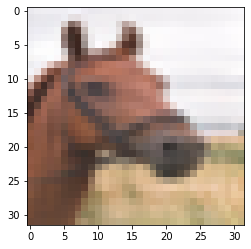

In [21]:
INDEX = 99
print("Original Label: {}; Predicted Label: {}".format(y_test[INDEX], np.argmax(preds_cnn[INDEX])))
print("Class Name: ", labels[int(y_test[INDEX])])

plt.imshow(X_test[INDEX])